<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/classifica%C3%A7%C3%A3o/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*texto em itálico*

# Carregamento dos dados

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing

names = [
         "NUM_CURSOS",
         "CODIGO_IES",
         "DEFICIENCIA_FISICA",
         "DEFICIENCIA_VISUAL",
         "DEFICIENCIA_AUDITIVA", 
         "DEFICIENCIA_COGNITIVA", 
         "DEFICIENCIA_MULTIPLA", 
         "RECURSOS_DEF_FISICA",
         "RECURSOS_DEF_VISUAL", 
         "RECURSOS_DEF_AUDITIVA", 
         "RECURSOS_DEF_COGNITIVA",
         "RECURSOS_DEF_MULTIPLA"
         ]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(names)
names=le.transform(names)

dataset = pd.read_csv("dados_ies_sem_nan_utf8.csv", index_col=0, encoding="utf8")

#Substitui NaN por 0
#dataset.fillna("NaN", inplace=True)

#dataset.dropna(subset=["TIPO_CATEGORIA_ADM"], inplace=True)

#print(set(dataset["TIPO_CATEGORIA_ADM"]))

# Categorização e mapeamento dos dados de strings para inteiros

In [61]:
from sklearn import preprocessing
from copy import deepcopy

u = deepcopy(dataset)

le = preprocessing.LabelEncoder()

le.fit(dataset["TIPO_CATEGORIA_ADM"])
dataset["TIPO_CATEGORIA_ADM"]=le.transform(dataset["TIPO_CATEGORIA_ADM"])
le_name_mapping_1 = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(dataset["REGIAO"])
dataset["REGIAO"]=le.transform(dataset["REGIAO"])
le_name_mapping_2 = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(dataset["UF"])
dataset["UF"]=le.transform(dataset["UF"])
le_name_mapping_3 = dict(zip(le.classes_, le.transform(le.classes_)))

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

import json
a = json.dumps(le_name_mapping_1, default=np_encoder, indent=True, ensure_ascii=False)
b = json.dumps(le_name_mapping_2, default=np_encoder, indent=True, ensure_ascii=False)
c = json.dumps(le_name_mapping_3, default=np_encoder, indent=True, ensure_ascii=False)

ff = '{'
ff += f'\n"TIPO_CATEGORIA_ADM": [\n{a}\n],\n"REGIAO": [\n{b}\n],\n"UF": [\n{c}\n]'
ff += '\n}'

f = open("mapa_categorias.json", "w")
f.write(ff)
f.close()

dataset.to_csv("dados_ies_categorizados.csv")


# Predição do dataset utilizando KNN

Processa células não padronizadas (células vazias)

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in dataset.columns:
  if dataset[i].dtype == object:
    dataset[i] = le.fit_transform(dataset[i])
  else:
    pass

dataset_encoded = le.fit_transform(dataset.columns)

Normaliza os dados usando StandardScaler e treina o modelo

In [63]:
X = dataset.drop(columns=["REGIAO", "TIPO_CATEGORIA_ADM", "UF", "CODIGO_IES", "NUM_CURSOS"])
y = dataset["TIPO_CATEGORIA_ADM"].values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Cria o objeto KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 4, 2, 4, 1, 1, 4, 2, 2, 1, 1,
       4, 2, 1, 2, 2, 1, 1, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 3, 2,
       5, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 4, 1, 1, 1, 2, 2, 2,
       2, 1, 4, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 4, 1, 1, 1, 2, 1, 1,
       1, 3, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 4, 1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 4, 1, 2, 1, 4, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 4, 1, 2, 2, 1, 4,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1])

Faz a predição

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  1  0  0  0  0]
 [ 0 87 26  1  3  0]
 [ 0 73 29  1  2  0]
 [ 1 19  4  0  2  0]
 [ 0 11  2  3  7  0]
 [ 0  3  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.45      0.74      0.56       117
           2       0.47      0.28      0.35       105
           3       0.00      0.00      0.00        26
           4       0.50      0.30      0.38        23
           5       0.00      0.00      0.00         4

    accuracy                           0.45       276
   macro avg       0.24      0.22      0.21       276
weighted avg       0.41      0.45      0.40       276



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Mean Error')

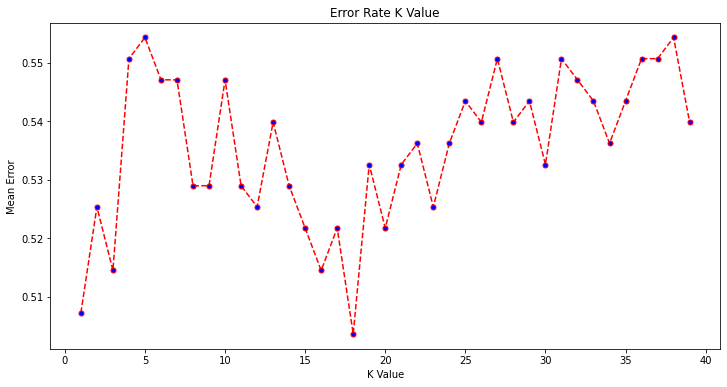

In [66]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')